In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from numpy.linalg import solve
import matplotlib.pyplot as plt
from math import cos, sin

Определю данные и задам центрально равномерные сетки

In [2]:
N = 8
n = 52
a = 0
b = (N + 7.0) / N
ysel = 60
lambda_ = 1 / (1 + (n - 48) / 2.0)

print('Отрезок: [{}; {}]'.format(a, b))
print('lambda:', lambda_)
print('Количество узлов сетки:', ysel)

Отрезок: [0; 1.875]
lambda: 0.3333333333333333
Количество узлов сетки: 60


In [4]:
B = np.linspace(a, b, ysel + 1)  # s
A = np.linspace(a, b, ysel + 1)  # tay

#lambda_ = 1 / (n - 49)

s = np.zeros((B.shape[0] - 1,))
for i in range(s.shape[0]):
    s[i] = (B[i + 1] + B[i]) / 2

tau = np.zeros((A.shape[0] - 1,))
for i in range(tau.shape[0]):
    tau[i] = (A[i + 1] + A[i]) / 2

h = (b - a) / ysel

print('Центрально равномерная сетка s:\n', s)
print('Центрально равномерная сетка tau:\n', tau)
print('Шаг сетки:', h)

Центрально равномерная сетка s:
 [0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375
 1.015625 1.046875 1.078125 1.109375 1.140625 1.171875 1.203125 1.234375
 1.265625 1.296875 1.328125 1.359375 1.390625 1.421875 1.453125 1.484375
 1.515625 1.546875 1.578125 1.609375 1.640625 1.671875 1.703125 1.734375
 1.765625 1.796875 1.828125 1.859375]
Центрально равномерная сетка tau:
 [0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375
 1.015625 1.046875 1.078125 1.109375 1.140625 1.171875 1.203125 1.234375
 1.265625 1.296875

Определю функции K(s, tau) и y(s)

In [5]:
def K(s, tau, N=8, n=52):
    if 0 <= s and s <= tau:
        return s * (2 * (N + 7.0) / N - tau)
    elif tau <= s and s <= (N + 7.0) / N:
        return tau * (2 * (N + 7.0) / N - s)
    

def y(s, N=8, n=52):
    return (N + 3.0) / N * (s**2 + (n - 48)/2.0)

In [6]:
ymas = np.zeros((ysel,))
for i in range(ysel):
    ymas[i] = y(s[i])
ymas

array([2.75033569, 2.75302124, 2.75839233, 2.76644897, 2.77719116,
       2.7906189 , 2.80673218, 2.82553101, 2.84701538, 2.8711853 ,
       2.89804077, 2.92758179, 2.95980835, 2.99472046, 3.03231812,
       3.07260132, 3.11557007, 3.16122437, 3.20956421, 3.2605896 ,
       3.31430054, 3.37069702, 3.42977905, 3.49154663, 3.55599976,
       3.62313843, 3.69296265, 3.76547241, 3.84066772, 3.91854858,
       3.99911499, 4.08236694, 4.16830444, 4.25692749, 4.34823608,
       4.44223022, 4.53890991, 4.63827515, 4.74032593, 4.84506226,
       4.95248413, 5.06259155, 5.17538452, 5.29086304, 5.4090271 ,
       5.52987671, 5.65341187, 5.77963257, 5.90853882, 6.04013062,
       6.17440796, 6.31137085, 6.45101929, 6.59335327, 6.7383728 ,
       6.88607788, 7.03646851, 7.18954468, 7.3453064 , 7.50375366])

In [7]:
F = np.zeros((s.shape[0], tau.shape[0]))

for i in range(s.shape[0]):
    for j in range(tau.shape[0]):
        delta = 1 if i == j else 0
        F[i][j] = delta - lambda_ * K(s[i], tau[j]) * h

pd.DataFrame(F)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.999392,-0.000603,-0.000598,-0.000593,-0.000587,-0.000582,-0.000577,-0.000572,-0.000567,-0.000562,...,-0.000353,-0.000348,-0.000343,-0.000338,-0.000333,-0.000328,-0.000323,-0.000318,-0.000313,-0.000308
1,-0.000603,0.998192,-0.001793,-0.001778,-0.001762,-0.001747,-0.001732,-0.001717,-0.001701,-0.001686,...,-0.001060,-0.001045,-0.001030,-0.001015,-0.000999,-0.000984,-0.000969,-0.000954,-0.000938,-0.000923
2,-0.000598,-0.001793,0.997012,-0.002963,-0.002937,-0.002912,-0.002886,-0.002861,-0.002836,-0.002810,...,-0.001767,-0.001742,-0.001717,-0.001691,-0.001666,-0.001640,-0.001615,-0.001589,-0.001564,-0.001539
3,-0.000593,-0.001778,-0.002963,0.995852,-0.004112,-0.004077,-0.004041,-0.004005,-0.003970,-0.003934,...,-0.002474,-0.002439,-0.002403,-0.002368,-0.002332,-0.002296,-0.002261,-0.002225,-0.002190,-0.002154
4,-0.000587,-0.001762,-0.002937,-0.004112,0.994713,-0.005241,-0.005196,-0.005150,-0.005104,-0.005058,...,-0.003181,-0.003136,-0.003090,-0.003044,-0.002998,-0.002953,-0.002907,-0.002861,-0.002815,-0.002769
5,-0.000582,-0.001747,-0.002912,-0.004077,-0.005241,0.993594,-0.006350,-0.006294,-0.006238,-0.006182,...,-0.003888,-0.003832,-0.003777,-0.003721,-0.003665,-0.003609,-0.003553,-0.003497,-0.003441,-0.003385
6,-0.000577,-0.001732,-0.002886,-0.004041,-0.005196,-0.006350,0.992495,-0.007439,-0.007373,-0.007306,...,-0.004595,-0.004529,-0.004463,-0.004397,-0.004331,-0.004265,-0.004199,-0.004133,-0.004066,-0.004000
7,-0.000572,-0.001717,-0.002861,-0.004005,-0.005150,-0.006294,-0.007439,0.991417,-0.008507,-0.008430,...,-0.005302,-0.005226,-0.005150,-0.005074,-0.004997,-0.004921,-0.004845,-0.004768,-0.004692,-0.004616
8,-0.000567,-0.001701,-0.002836,-0.003970,-0.005104,-0.006238,-0.007373,-0.008507,0.990359,-0.009555,...,-0.006009,-0.005923,-0.005836,-0.005750,-0.005664,-0.005577,-0.005491,-0.005404,-0.005318,-0.005231
9,-0.000562,-0.001686,-0.002810,-0.003934,-0.005058,-0.006182,-0.007306,-0.008430,-0.009555,0.989321,...,-0.006716,-0.006620,-0.006523,-0.006426,-0.006330,-0.006233,-0.006137,-0.006040,-0.005943,-0.005847


In [8]:
x = solve(F, ymas)
x

array([  1.22474768,  -1.82523784,  -4.87030975,  -7.9067509 ,
       -10.93085472, -13.93892966, -16.92730375, -19.89232909,
       -22.83038625, -25.73788874, -28.61128737, -31.44707455,
       -34.24178865, -36.99201815, -39.69440582, -42.34565286,
       -44.94252289, -47.48184589, -49.96052211, -52.37552581,
       -54.723909  , -57.00280499, -59.20943194, -61.3410962 ,
       -63.39519564, -65.36922283, -67.26076805, -69.0675223 ,
       -70.78728006, -72.41794202, -73.95751762, -75.40412751,
       -76.75600579, -78.01150223, -79.16908424, -80.22733875,
       -81.18497396, -82.04082086, -82.79383473, -83.44309637,
       -83.9878132 , -84.42732031, -84.76108117, -84.98868837,
       -85.10986407, -85.12446034, -85.03245937, -84.83397346,
       -84.52924491, -84.1186457 , -83.60267705, -82.98196881,
       -82.25727867, -81.42949126, -80.49961707, -79.46879121,
       -78.33827199, -77.10943945, -75.78379363, -74.36295276])

In [9]:
def p(s):
    return ((1320*np.sqrt(5)*sin(15*np.sqrt(5)/16) - 1408*cos(15*np.sqrt(5)/16) + 38533)*sin(np.sqrt(5)/2*s) + 1320*(np.sqrt(5)*cos(15*np.sqrt(5)/16) + 16*sin(15*np.sqrt(5)/16)/15)*(cos(np.sqrt(5)/2*s)+4)) / (2400*np.sqrt(5)*cos(15*np.sqrt(5)/16)+2560*sin(15*np.sqrt(5)/16))
resh = np.array([p(i) for i in s])

In [13]:
resh

array([  1.2214252 ,  -1.83436212,  -4.88522518,  -7.92744017,
       -10.95729381, -13.97108795, -16.96514399, -19.93580746,
       -22.87945243, -25.79248594, -28.67135242, -31.51253798,
       -34.31257472, -37.06804498, -39.77558549, -42.43189148,
       -45.03372073, -47.57789749, -50.0613164 , -52.48094625,
       -54.83383368, -57.11710682, -59.32797874, -61.46375091,
       -63.52181644, -65.49966331, -67.39487739, -69.20514543,
       -70.92825786, -72.56211147, -74.10471202, -75.55417664,
       -76.90873616, -78.16673721, -79.32664432, -80.38704172,
       -81.34663512, -82.20425325, -82.95884933, -83.6095023 ,
       -84.15541801, -84.59593011, -84.93050092, -85.15872208,
       -85.28031502, -85.29513133, -85.20315292, -85.00449206,
       -84.69939124, -84.28822285, -83.77148875, -83.14981967,
       -82.42397439, -81.59483886, -80.66342513, -79.63087003,
       -78.49843391, -77.26749897, -75.93956767, -74.51626086])

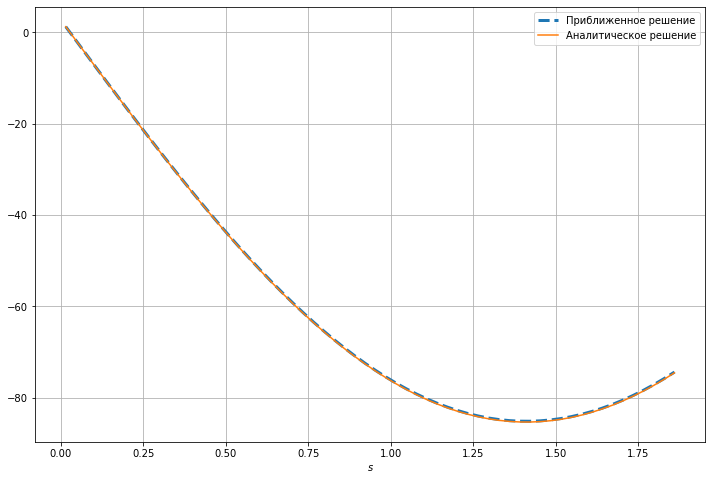

In [43]:
plt.figure(figsize=(12, 8))

plt.plot(s, x, linestyle='--', linewidth=3, label="Приближенное решение")
plt.plot(s, resh, label="Аналитическое решение")

plt.xlabel(r'$s$')
plt.grid()
plt.legend()
plt.show()

In [44]:
ap = max(abs(x - resh))
print('Абсолютная погрешность:', round(ap, 5))

Абсолютная погрешность: 0.17069
